In [3]:

import pandas as pd

from datetime import date
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import datetime
from datetime import date

import dash
import dash_core_components as dcc
import dash_html_components as html
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from dash.dependencies import Input, Output
from dash_html_components.Datalist import Datalist


In [4]:
sns.set(rc={'figure.figsize':(10, 6)})

In [5]:
# read data from file
data = pd.read_excel("data//data.xlsx")
data.head()

,Document Date,Year/Month,Year,Month,supplier delivery date,delivery date,Company Code,Country,Purchasing Doc.,Item,...,open quantity,Delivery deviation in days,deviation indicator,deviation cause,deviation cause text,Net Value,Local Currency,Counter,Unnamed: 34,Unnamed: 35
0,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,1,...,3,NaN,NaN,3,under-delivery,6720.0,EUR,1,NaN,NaN
1,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,2,...,3,NaN,NaN,3,under-delivery,18162.0,EUR,1,NaN,NaN
2,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,3,...,3,NaN,NaN,3,under-delivery,5710.0,EUR,1,NaN,NaN
3,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,4,...,3,NaN,NaN,3,under-delivery,29890.0,EUR,1,NaN,NaN
4,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,5,...,3,NaN,NaN,3,under-delivery,9646.0,EUR,1,NaN,NaN


# Datenanpassungen

In [6]:
#dropping some columns since unnecessaary 
data.drop("Unnamed: 34", inplace=True, axis = 1) 
data.drop("Unnamed: 35", inplace=True, axis = 1) 
data.drop("Delivery deviation  in days", inplace=True, axis = 1)

In [7]:
data["Delivery deviation in days"] = data["delivery date"] - data["supplier delivery date"]

In [8]:
data["Delivery deviation in days"] = data["Delivery deviation in days"].apply(lambda x: float(x.days))

In [25]:
conditions = [(data['Delivery deviation in days'] <= 0),
              (data['Delivery deviation in days'] >= 1) & (data['Delivery deviation in days'] <= 4),
              (data['Delivery deviation in days'] >= 5) & (data['Delivery deviation in days'] <= 10),
              (data['Delivery deviation in days'] > 10)]

values = ['in time', 'late: < 5 days', 'late: 5 to 10 days', 'late: > 10 days']


data['deviation indicator'] = np.select(conditions, values)

In [26]:
data['Year'] = data['Document Date'].dt.year
data['Month'] = data['Document Date'].dt.month
data['Year/Month'] = data['Document Date'].dt.year.astype(str)+'/'+data['Document Date'].dt.month.astype(str)

In [27]:
data.to_csv("data_01.csv")

# Seite 1: Lieferantenperformance (Visualisierung)

Gesamtsumme Ordered Spend & Anzahl Bestellungen (aktuel vs vorjahr)

In [37]:
#orderedSpend_year = data.groupby(["Year"])[["Net Value"]].sum().reset_index()

#number of orders not in time
orders_notIntime = data[data['deviation indicator'] != "in time"]
orders_notIntime_2020 = orders_notIntime[orders_notIntime["Year"]==2020]
numbOrders_notIntime_2020 = len(orders_notIntime_2020)
print(numbOrders_notIntime_2020)


29


In [38]:
#number of orders not in time in %
orders_2020 = data[data["Year"]==2020]
numbOrders_2020 = len(orders_2020)
numOrd_nIt_2020_percent = ((numbOrders_notIntime_2020 / numbOrders_2020) * 100)
print(numOrd_nIt_2020_percent, "%")

0.6909697402906838 %


Gesamtsumme Ordered Spend & Anzahl Bestellungen der abweichenden Lieferungen nach Abweichungsgründen (deviation cause) & Höhe der Verzögerung (deviation indicator)

In [84]:
deviationCause_deviationDays = orders_notIntime.groupby(["deviation cause"])[["Delivery deviation in days"]].sum().reset_index()
deviationCause_deviationDays

,deviation cause,Delivery deviation in days
0,0,75.0
1,5,28.0
2,7,656.0
3,8,7.0
4,9,2.0
5,10,18.0


Abweichende Lieferungen (Ordered Spend & Anzahl Bestellungen) im aktuellen Jahr (Document Year, YTD) nach Monaten (Document Month/Year)

In [103]:

numDeviation_month_2020 = orders_notIntime_2020.groupby(["Month"])['deviation indicator'].count().reset_index()
numDeviation_month_2020
#numbOrders_month_2019 = df2019_without_purchDoc_duplicates.groupby(["Month"])[["Purchasing Doc."]].count().reset_index().rename(columns={"Purchasing Doc.":"numbOrders"})

,Month,deviation indicator
0,1,13
1,2,10
2,4,2
3,5,4


Abweichende Lieferungen (Ordered Spend & Anzahl Bestellungen) im aktuellen Jahr (YTD) nach Einkaufsorganisation (Purchasing Org.)

In [106]:

numDeviation_Org_2020 = orders_notIntime_2020.groupby(["Purchasing Doc."])['deviation indicator'].count().reset_index()
numDeviation_Org_2020


,Purchasing Doc.,deviation indicator
0,8207889750,2
1,8207890736,2
2,8207900183,1
3,8207900184,1
4,8207914670,2
5,8207914671,2
6,8207928920,1
7,8207935452,2
8,8207935454,2
9,8207965091,2


Abweichende Lieferungen (Ordered Spend & Anzahl Bestellungen) der Top 10 Lieferanten nach Ordered Spend (aktuelles Jahr)

In [112]:
numDeviation_Org_2020.sort_values(by=['deviation indicator'])

,Purchasing Doc.,deviation indicator
16,8208056836,1
2,8207900183,1
3,8207900184,1
13,8207979083,1
12,8207968961,1
6,8207928920,1
14,8208029380,2
11,8207965124,2
10,8207965110,2
0,8207889750,2


In [113]:
df2019_without_purchDoc_duplicates = data_2019.drop_duplicates(subset=['Purchasing Doc.'])
df2020_without_purchDoc_duplicates = data_2020.drop_duplicates(subset=['Purchasing Doc.'])

numbOrders_month_2019 = df2019_without_purchDoc_duplicates.groupby(["Month"])[["Purchasing Doc."]].count().reset_index().rename(columns={"Purchasing Doc.":"numbOrders"})
numbOrders_month_2020 = df2020_without_purchDoc_duplicates.groupby(["Month"])[["Purchasing Doc."]].count().reset_index().rename(columns={"Purchasing Doc.":"numbOrders"})

NameError: name 'data_2019' is not defined

In [ ]:
orderdSpend_month_2019

,Month,Net Value
0,1,7.534322e+05
1,2,3.807863e+07
2,3,8.752134e+05
3,4,1.602919e+06
4,5,2.071517e+06
5,6,1.183767e+06
6,7,3.008581e+06
7,8,3.556269e+06
8,9,7.671278e+06
9,10,5.528378e+06


In [ ]:
numbOrders_month_2019

,Month,numbOrders
0,1,230
1,2,269
2,3,442
3,4,374
4,5,506
5,6,568
6,7,718
7,8,680
8,9,702
9,10,756


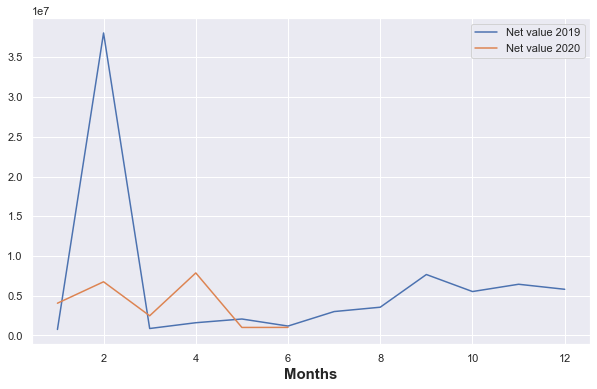

In [ ]:
#  data
x1 = orderdSpend_month_2019["Month"]
y1 = orderdSpend_month_2019["Net Value"]

x2 = orderdSpend_month_2020["Month"]
y2 = orderdSpend_month_2020["Net Value"]

# plot lines
plt.plot(x1, y1, label = "Net value 2019" )
plt.plot(x2, y2, label = "Net value 2020")
plt.xlabel('Months', fontweight ='bold', fontsize = 15)

plt.legend()
plt.show()

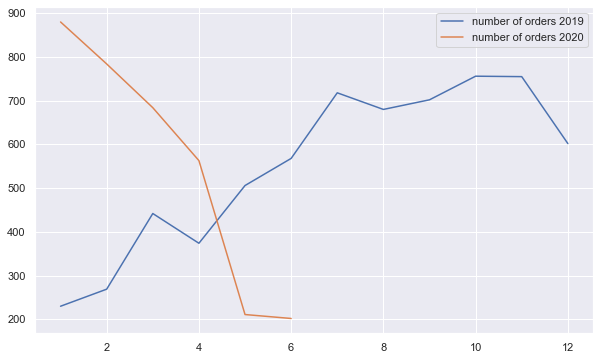

In [ ]:
x3 = numbOrders_month_2019["Month"]
y3 = numbOrders_month_2019["numbOrders"]

x4 = numbOrders_month_2020["Month"]
y4 = numbOrders_month_2020["numbOrders"]

plt.plot(x3, y3, label = "number of orders 2019")
plt.plot(x4, y4, label = "number of orders 2020")
plt.legend()
plt.show()

Ordered Spend & Anzahl Bestellungen im aktuellen Jahr (YTD) nach
Einkaufsorganisation im Vergleich zum Vorjahr

In [ ]:
orderdSpend_purchOrg_2019 = data_2019.groupby(["Purchasing Org."])[["Net Value"]].sum().reset_index()
orderdSpend_purchOrg_2020 = data_2020.groupby(["Purchasing Org."])[["Net Value"]].sum().reset_index()

In [ ]:
df2019_without_purchDoc_duplicates = data_2019.drop_duplicates(subset=['Purchasing Doc.'])
df2020_without_purchDoc_duplicates = data_2020.drop_duplicates(subset=['Purchasing Doc.'])

numbOrders_purchOrg_2019 = df2019_without_purchDoc_duplicates.groupby(["Purchasing Org."])[["Purchasing Doc."]].count().reset_index().rename(columns={"Purchasing Doc.":"numbOrders"})
numbOrders_purchOrg_2020 = df2020_without_purchDoc_duplicates.groupby(["Purchasing Org."])[["Purchasing Doc."]].count().reset_index().rename(columns={"Purchasing Doc.":"numbOrders"})

In [ ]:
# zum string umwandeln damit plotly die zahlen nicht als zahl sondern als eine Bezeichnung für Organistan erkennt
orderdSpend_purchOrg_2019["Purchasing Org."] = orderdSpend_purchOrg_2019["Purchasing Org."].apply(lambda x: 'PO: ' + str(x))
orderdSpend_purchOrg_2020["Purchasing Org."] = orderdSpend_purchOrg_2020["Purchasing Org."].apply(lambda x: 'PO: ' + str(x))
numbOrders_purchOrg_2019["Purchasing Org."] = numbOrders_purchOrg_2019["Purchasing Org."].apply(lambda x: 'PO: ' + str(x))
numbOrders_purchOrg_2020["Purchasing Org."] = numbOrders_purchOrg_2020["Purchasing Org."].apply(lambda x: 'PO: ' + str(x))

In [ ]:
orderdSpend_purchOrg_2020.info()
list(orderdSpend_purchOrg_2019["Purchasing Org."])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Purchasing Org.  4 non-null      object 
 1   Net Value        4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


['PO: 54',
 'PO: 5200',
 'PO: 5210',
 'PO: 5310',
 'PO: 5320',
 'PO: 5400',
 'PO: 5410']

In [ ]:
# set height of bar
fig = go.Figure(data=[
   # go.Bar(name='Order spend 2019', x0=list(orderdSpend_purchOrg_2019["Purchasing Org."]), y= orderdSpend_purchOrg_2019["Net Value"]),
    go.Bar(name='Order spend 2020', x=list(orderdSpend_purchOrg_2020["Purchasing Org."]), y=orderdSpend_purchOrg_2020["Net Value"])
])

# Change the bar mode
# fig.update_layout(barmode='group')
fig.show()

In [ ]:
orderdSpend_numbOrders2020["Purchasing Org."]


NameError: name 'orderdSpend_numbOrders2020' is not defined

In [ ]:
# set height of bar
numbOrders_2019 = orderdSpend_numbOrders2019["Purchasing Org."]
numbOrders_2020 = orderdSpend_numbOrders2020["Purchasing Org."]

fig = go.Figure(data=[
    go.Bar(name='Number of orders 2019', x=orderdSpend_numbOrders2019["Purchasing Org."], y= numbOrders_2019),
    go.Bar(name='Numbers of orders 2020', x=orderdSpend_numbOrders2020["Purchasing Org."], y=numbOrders_2020)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

Top 10 Lieferanten nach Ordered Spend (aktuelles Jahr) im Vergleich zum
Vorjahr

In [ ]:
supplier_netValue = data.groupby(["Year","Supplier name"])[["Net Value"]].sum().reset_index().sort_values(by = "Net Value",  ascending=False)

In [ ]:
top10_2019 = data_2019.groupby(["Supplier name"])[["Net Value"]].sum().reset_index().sort_values(by = "Net Value",  ascending=False).head(10)
top10_2020 = data_2020.groupby(["Supplier name"])[["Net Value"]].sum().reset_index().sort_values(by = "Net Value",  ascending=False).head(10)

In [ ]:
top10_2019

,Supplier name,Net Value
36,ETELIERS DE LE HEUTE-GERU,21244885.45
69,LISI EERUSPECE,9124664.70
54,HUMET FESTENING SYSTEMS,7548801.98
35,ESPE HUTCHINSUN EERUSPECE,7423616.00
105,SCHULZE GMBH,3025298.13
107,SEFREN CEBIN FRENCE,3003709.41
2,ALB GMBH,2368218.45
95,PREMIUM GMBH,2014186.10
38,EVIETIN LEUPHEIM GMBH,1823458.72
106,SEEB EB (PUPL),1706573.16


In [ ]:

fig = go.Figure(data=[
    go.Bar(name='Order spend 2019', x=top10_2019["Supplier name"] , y= top10_2019["Net Value"]),
#     go.Bar(name='Order spend 2020', x=top10_2020["Supplier name"] , y=top10_2020["Net Value"])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

fig = go.Figure(data=[
#     go.Bar(name='Order spend 2019', x=top10_2019["Supplier name"] , y= top10_2019["Net Value"]),
    go.Bar(name='Order spend 2020', x=top10_2020["Supplier name"] , y=top10_2020["Net Value"])
])
# Change the bar mode
# fig.update_layout(barmode='group')
fig.show()